# PROBLEM DEFINTION

DATASET: This dataset comprises of data from Bike Sharing Company related to Bike usage over the year 2011 & 2012 in Capital bikeshare system in Washington, DC .

PROBLEM DEFINITION:  This is a supervised learning exercise and regression or classification models can be used to solve the problem.

Regression:  Predict demand for Bike in particular time of the year.  

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered



# IMPORT FUNCTIONALITY

In [0]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import (r2_score,explained_variance_score,max_error,mean_absolute_error,
mean_squared_error,mean_squared_log_error,median_absolute_error)
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# to make this notebook's output stable across runs
np.random.seed(123)

# DATA DOWNLOAD AND REVIEW

Data Set Information:

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset


In [2]:
#!git clone https://github.com/emanhamed/Houses-dataset
!git clone https://github.com/asifsundrani/SCS_3253_030-Machine-Learning-Project

Cloning into 'SCS_3253_030-Machine-Learning-Project'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


In [0]:
df_hour=pd.read_csv('SCS_3253_030-Machine-Learning-Project/hour.csv')
df_day=pd.read_csv('SCS_3253_030-Machine-Learning-Project/day.csv')

In [4]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Comments: df_day is the summary of cumulative hourly event of the day and we won't use this data for modelling due to lower number of samples.

In [5]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


All the data fields are in numeric except dteday. Also there is no null value in the dataset. There are certain fields which can be eliminated for the purpose for this exercise 
a)instant: this is just a reference    
b)dteday: date which is not relevant for this exercise   
c)yr: not relevant for the purpose of the exercise   
d)casual & registered: target value set to total value so need to distribute in casual and registered.   

These fields are not relevant for the purpose of this exercise.    

Target field is going to cnt i.e. total count of bikers i.e. both registered and casual.

In [6]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Categorical Fields: Following fields can be classified as categorical i.e. season, month, hour,weekday & weathersit. The value assoicated with them are in range of numbers therefore it would be interesting to see how model behaves with and without onehotcode translation.

Numeric Fields: Numeric fields include weather related characteristics and these have been normalized based on each scenario. Fields include temp,atemp, hum & windspeed.

Target field is cnt i.e. total count of riders

In [7]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# DATA VISUALIZATION

In [0]:
from pandas.plotting import scatter_matrix

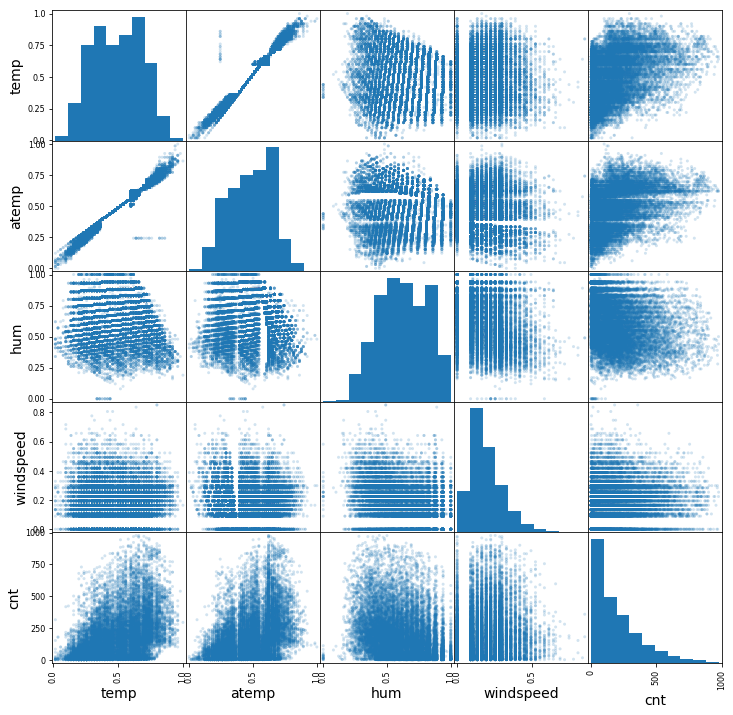

In [10]:
scatter_matrix(df_hour[['temp','atemp','hum','windspeed','cnt']], alpha=0.2, figsize=(12, 12))
save_results_to = ''
plt.savefig(save_results_to + 'scatter matrix', dpi = 300)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f81bcf5c8d0>,
      dtype=object)

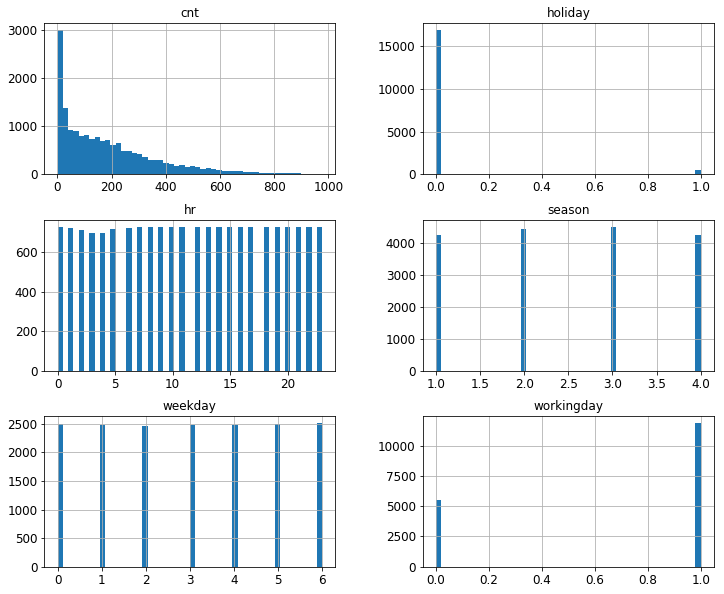

In [0]:
df_hour[['season','hr','holiday','weekday','workingday','cnt']].hist(bins=50,figsize=(12,10))

Observations:

Interestingly demand for bikes are consistent accross following areas i.e. weekdays,hours, season and working day vs weekend
However, lower demand on holidays vs other days (weekdays and weekends)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f81bcceb438>,
      dtype=object)

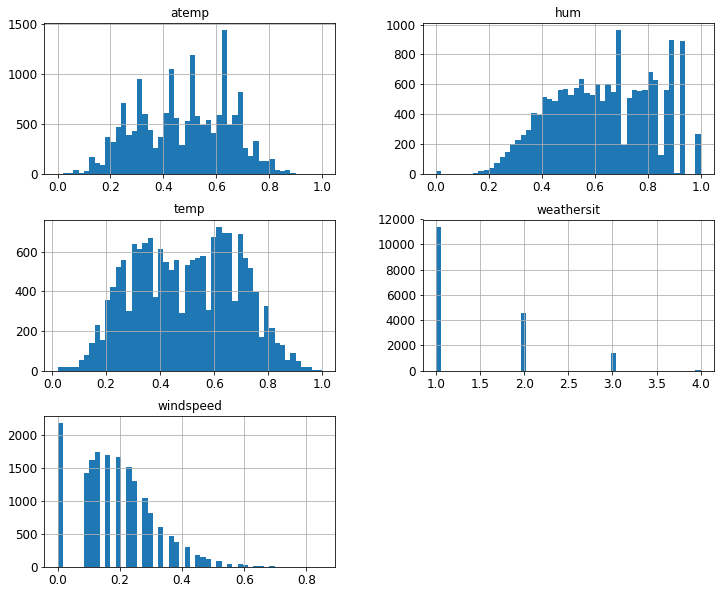

In [0]:
df_hour[['temp','atemp','hum','windspeed','weathersit']].hist(bins=50,figsize=(12,10))

Observations:

Windspeed: Higher windspeed drives lower demand for bike as shown by the graph.  
Weathersit: Demand for bikes goes down as weather from clear to cloudy and bad weather reduces the demand for the bike.  
temp (Normalized temperature in Celsius) and atemp(Normalized feeling temperature in Celsius) are showing normal distribution curve.  
humidity: interestingly higher humidity encouraged more bikers to bike.

# DATA CLEAN UP

In [11]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
df_hour['weekday'].value_counts(sort=False)

0    2502
1    2479
2    2453
3    2475
4    2471
5    2487
6    2512
Name: weekday, dtype: int64

Normal distribution of Bikers over the weekdays.

# DATA PREPROCESSING AND PIPELINE

In [0]:
df_model=df_hour.drop(['instant','dteday','yr','casual','registered'], axis=1)

These fields are not relevant related to the problem therefore they are being dropped off from the evaluation.

In [0]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
season        17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
cnt           17379 non-null int64
dtypes: float64(4), int64(8)
memory usage: 1.6 MB


In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

categorical_features = ['season', 'mnth', 'hr','weekday','weathersit','holiday','workingday']
categorical_transformer = Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))])

numeric_features = ['temp','atemp','hum','windspeed']
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
        ])

#DATA SPLIT - TARGET & TRAIN_TEST_SPLIT

In [15]:
X = df_model.drop('cnt', axis=1)
y = df_model['cnt']
print(X.shape)
print(y.shape)

(17379, 11)
(17379,)


In [16]:
from sklearn.model_selection import train_test_split

X_tr, X_te, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_tr.shape,y_train.shape)
print(X_te.shape,y_test.shape)
print('Mean of X_Train:',np.mean(y_train))

(13903, 11) (13903,)
(3476, 11) (3476,)
Mean of X_Train: 189.41451485290943


In [17]:
X_train=preprocessor.fit_transform(X_tr)
X_test=preprocessor.transform(X_te)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
print('Mean of X_Train:',np.mean(y_train))

(13903, 59) (13903,)
(3476, 59) (3476,)
Mean of X_Train: 189.41451485290943


In [18]:
from sklearn.preprocessing import PolynomialFeatures
d=2
poly_features = PolynomialFeatures(degree=d, interaction_only=False,include_bias=False)
X_poly = poly_features.fit_transform(X_train)
X_poly.shape

(13903, 1829)

In [19]:
X_poly_test = poly_features.fit_transform(X_test)
X_poly_test.shape

(3476, 1829)

# SET UP GRID SEARCH AND POLYNOMIAL FEATURES (ADD COMPLEXITY)

In [0]:
from sklearn.model_selection import GridSearchCV

def best_parameters(estimator,param_grid,cv):
    gs1=GridSearchCV(estimator,param,cv=cv,verbose=1,n_jobs=-1)
    gs1_results=gs1.fit(X_train,y_train)
    estimator=gs1_results
    print('Best_results:',estimator.best_score_)
    print('Best_parameters:',estimator.best_params_)
    print('Best_estimator:',estimator.best_estimator_)



In [0]:
def best_parameters_poly(estimator,param_grid,cv):
    gs1=GridSearchCV(estimator,param,cv=cv,verbose=1,n_jobs=-1)
    gs1_results=gs1.fit(X_poly,y_train)
    estimator=gs1_results
    print('Best_results:',estimator.best_score_)
    print('Best_parameters:',estimator.best_params_)
    print('Best_estimator:',estimator.best_estimator_)

# SET UP OF METRICS AND EVALUATION :

In [0]:
# PERFORMANCE METRICS FOR REGRESSION METHODOLOGY

def lin_perform_metrics(target,prediction):
    print('R2_Square: ',r2_score(target,prediction))
    print('Explained_Variance_Score: ',explained_variance_score(target,prediction))
    
    print('Mean_absolute_error: ',mean_absolute_error(target,prediction)) 
    print('Median_absolute_error: ',median_absolute_error(target,prediction))
    print('Max_error: ',max_error(target,prediction))
    
    MSE=mean_squared_error(target,prediction)
    print('MSE: ',MSE)
    print('RMSE: ',np.sqrt(MSE))

def lin_peform_metrics_log(target,prediction):
     print('Mean_squared_log_error: ',mean_squared_log_error(target,prediction)) 

In [0]:
# LEARNING CURVE FULL DATASET EVALUATION

def plot_learning_curve_full(model,X,y):
    X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)
    train_errors,val_errors=[],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict=model.predict(X_train[:m])
        y_val_predict=model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label='Training MSE Score')
    plt.plot(np.sqrt(val_errors),'b-',linewidth=2,label='Validation MSE Score')

In [0]:
# LEARNING CURVE SAMPLES UNITS

def plot_learning_curve_samples(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt

In [0]:
# VALIDATION CURVE only ploting

def plot_validation_curve(train_scores,test_scores,param_range):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.title("Validation Curve")
    plt.xlabel(r"$\gamma$")
    plt.ylabel("Score")
    #plt.ylim(0.0, 1.1)
    lw = 2
    plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()

In [0]:
# CROSS VALIDATION SCORE

def display_scores(scores):
    print('RMSE_Scores: ',scores)
    print("RMSE_Scores_Mean:", scores.mean())
    print("RMSE_Scores_Standard deviation:", scores.std())



In [0]:
# CROSS VALIDATION SCORE - CALCULATION AND OUTPOUT

def cross_val_score_full(estimator,X,y,scoring,cv):
    scores=cross_val_score(estimator,X,y,scoring,cv)
    scores_rmse=np.sqrt(-scores)
    print('Scores: ',scores_rmse)
    print("Mean:", scores_rmse.mean())
    print("Standard deviation:", scores_rmse.std())

# ML REGRESSION ALGORITHMS MODELS

1. SGD REGRESSOR
2. LINEAR REGRESSION 
3. LINEAR - SVR 
4. SVR
5. DECISION TREE
6. KNEIGHBORS
7.RANDOMFOREST
8. BAGGING
9. VOTING
10. REGULARIZATION
11. BOOSTING GRADIENT REGRESSOR
12. NEURAL NETWORK

Models

*   Original Data with Scaling and conversion of categorical data
*   Data with added Polynomial Features

Performance Metrics Methodologies:

*   Regression Metrics - R2/RMSE/Absolute Error
*   Cross Validation Score - Mean of R2
*   Learning Curve - R2 and evaluation based on # of various samples bins i.e. 100,1000,10000
*   Validation Curve - R2 and evaluation based on hyper parameters


The Mean Absolute Error (or MAE) is the average of the absolute differences between predictions and actual values. It gives an idea of how wrong the predictions were.
The Mean Squared Error (or MSE) is much like the mean absolute error in that it provides a gross idea of the magnitude of error.
Taking the square root of the mean squared error converts the units back to the original units of the output variable and can be meaningful for description and presentation. This is called the Root Mean Squared Error (or RMSE).
The R^2 (or R Squared) metric provides an indication of the goodness of fit of a set of predictions to the actual values. In statistical literature, this measure is called the coefficient of determination.

In [0]:
# Variable Set up

cv=10

#1.SGD-REGRESSOR EVALUATION

Following steps followed to develop models:   
First train the data with algorithm and checked overfitting or not through cross validation and learning curve method
Second if the model is not overfitting then applied feature engineering through polynomial feature and checked overfitting or not through cross validation and learning curve method   
Lastly, calculated best parameters related to the model

In [28]:
# Basic Set up related to SGDRegressor

from sklearn.linear_model import SGDRegressor
lin_reg_SGD=SGDRegressor(random_state=42)
lin_reg_SGD.get_params()

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_loss',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': 42,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [0]:
# Train the data with no added features with performance metrics

a=lin_reg_SGD.fit(X_train,y_train)
y_pred_SGD=a.predict(X_train)

lin_perform_metrics(y_train,y_pred_SGD)


R2_Square:  0.6327407931679956
Explained_Variance_Score:  0.6331968948040358
Mean_absolute_error:  79.65184408900929
Median_absolute_error:  57.46733435379285
Max_error:  474.205753868473
MSE:  12033.309543955203
RMSE:  109.69644271331319


Observations: R2 score is low which means this model prediction is not good which is also evident from RMSE high score when you consider y_train mean is 189.

In [0]:
# CROSS VALIDATION SCORE EVALUATION - MEAN OF R2
cross_val_score(lin_reg_SGD,X_train,y_train,cv=cv).mean()



0.6300484658017598

Observations: CV R2 score is very close to the original result which means that validation model is performing well and it is not overfitting the dataset.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

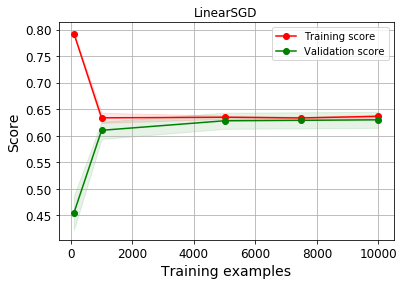

In [32]:
# LEARNING CURVE TO EVALUATE PERFORMANCE BASED ON BLOCKS OF SAMPLES

size=[100,1000,5000,7500,10000]
plot_learning_curve_samples(lin_reg_SGD, 'LinearSGD', X_train, y_train, ylim=None, cv=cv,
                        n_jobs=-1, train_sizes=size)

Observations: Learning curve result is showing that this model best R2 score are flat after 5000 samples .

In [0]:
# SGD model applying on Train Data with feature engineering

lin_reg_SGD.fit(X_poly,y_train)
y_pred_SGD_poly=lin_reg_SGD.predict(X_poly)
lin_perform_metrics(y_train,y_pred_SGD_poly)


R2_Square:  0.8549733499424739
Explained_Variance_Score:  0.8549906866471491
Mean_absolute_error:  50.238714902851164
Median_absolute_error:  36.237785810575645
Max_error:  406.9391573081589
MSE:  4751.822526979878
RMSE:  68.93346449279825


The model performance has improved  over 32% just adding one degree of feature.

In [0]:
# Evaluate Cross Val Score on Dataset with added features
cross_val_score(lin_reg_SGD,X_poly,y_train,cv=cv).mean()

0.8370798032303745

Observation:  CV score is lower than the model without CV.

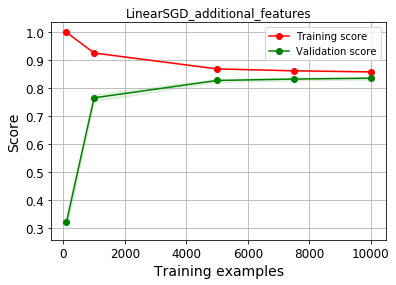

In [33]:
plot_learning_curve_samples(lin_reg_SGD, 'LinearSGD_additional_features', X_poly, y_train, ylim=None, cv=cv,
                        n_jobs=-1, train_sizes=size)
save_results_to = ''
plt.savefig(save_results_to + 'LinearSGD', dpi = 300)

Observation:  Validation score is close to the training model which it is not overfitted yet.

In [0]:
# DETERMINE BEST PARAMETERS RESULTED ASSOCIATED WITH X_POLY DATA
alpha=[0.0001,0.001,0.01,0.1,1,10,100]
penalty=['l2','l1','elasticnet']
param ={'alpha':alpha,'penalty': penalty}
best_parameters_poly(lin_reg_SGD,param,cv=cv)

Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:  1.6min finished


Best_results: 0.837694679270226
Best_parameters: {'alpha': 0.01, 'penalty': 'l1'}
Best_estimator: SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l1', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)


**CONCLUSION:** SGD REGRESSOR MODEL WITH 2 DEGREE OF POLYNOMIAL IS PERFORMING VERY WELL WITH R2 SCORE IS ABOVE 0.80. 

#2.LINEAR REGRESSOR EVALUATION

In [34]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [0]:
# Train the data with no added features with performance metrics with no CV

lin_reg.fit(X_train,y_train)
y_pred_lin_reg=lin_reg.predict(X_train)

lin_perform_metrics(y_train,y_pred_lin_reg)

R2_Square:  0.6333171267805959
Explained_Variance_Score:  0.6333171267805959
Mean_absolute_error:  79.25944079175646
Median_absolute_error:  56.654444408712266
Max_error:  476.38000751926825
MSE:  12014.425876420142
RMSE:  109.61033654003687


Observations: R2 score is low which means this model prediction is not good which is also evident from RMSE high score when you consider y_train mean is 189.

In [0]:
# CROSS VALIDATION SCORE EVALUATION - MEAN OF R2

cross_val_score(lin_reg,X_train,y_train,cv=cv).mean()

0.6301644002256567

Observations: CV R2 score is very close to the original result which means that validation model is performing well and it is not overfitting the dataset.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

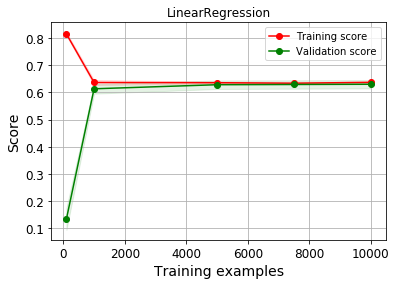

In [0]:
# LEARNING CURVE TO EVALUATE PERFORMANCE BASED ON BLOCKS OF SAMPLES

plot_learning_curve_samples(lin_reg, 'LinearRegression', X_train, y_train, ylim=None, cv=cv,
                        n_jobs=-1, train_sizes=size)

Comments: Learning curve result is showing that this model best R2 score are flat after 5000 samples .

In [0]:
# Linear model applying on Train Data with feature engineering

lin_reg.fit(X_poly,y_train)
y_pred_linreg_poly=lin_reg.predict(X_poly)
lin_perform_metrics(y_train,y_pred_linreg_poly)

R2_Square:  0.8587717894563467
Explained_Variance_Score:  0.8587717894563467
Mean_absolute_error:  49.499634026324465
Median_absolute_error:  35.79412952745116
Max_error:  410.5645089519726
MSE:  4627.366018867527
RMSE:  68.02474563618395


The model performance has improved by 37% just adding one degree of feature.

In [0]:
# Evaluate Cross Val Score on Dataset with added features

cross_val_score(lin_reg,X_poly,y_train,cv=cv).mean()

0.8359940726145121

Observation:  CV score is lower than the model without CV.

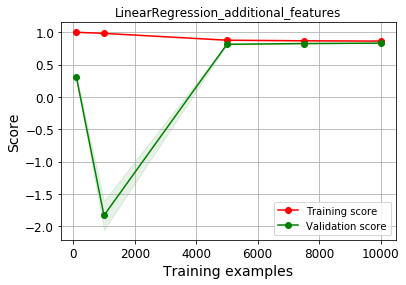

In [35]:
plot_learning_curve_samples(lin_reg, 'LinearRegression_additional_features', X_poly, y_train, ylim=None, cv=cv,
                        n_jobs=-1, train_sizes=size)
save_results_to = ''
plt.savefig(save_results_to + 'Linear_Regression', dpi = 300)

Observation:  Validation score is close to the training model which it is not overfitted yet.

**CONCLUSION:** LINEAR REGRESSOR MODEL WITH 2 DEGREE OF POLYNOMIAL IS PERFORMING VERY WELL WITH R2 SCORE IS ABOVE 0.80.

# 3.LINEAR-SVR EVALUATION

In [0]:
from sklearn.svm import LinearSVR
lin_SVR=LinearSVR(random_state=42)
lin_SVR.get_params

<bound method BaseEstimator.get_params of LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)>

In [0]:
# Train the data with no added features with performance metrics with no CV

lin_SVR.fit(X_train,y_train)
y_pred_lin_SVR=lin_SVR.predict(X_train)

lin_perform_metrics(y_train,y_pred_lin_SVR)

R2_Square:  0.5754417921712207
Explained_Variance_Score:  0.5901634118536487
Mean_absolute_error:  79.24870885835276
Median_absolute_error:  50.77158249940891
Max_error:  595.2125212770032
MSE:  13908.940601622851
RMSE:  117.93617172701025


In [0]:
# CROSS VALIDATION SCORE EVALUATION - MEAN OF R2
cross_val_score(lin_SVR,X_train,y_train,cv=cv).mean()

0.5676880268073471

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

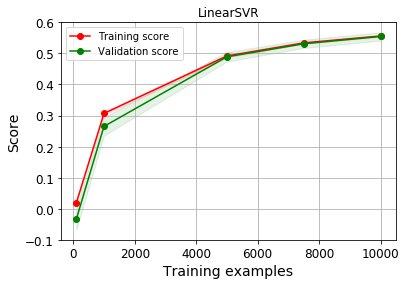

In [0]:
# LEARNING CURVE TO EVALUATE PERFORMANCE BASED ON BLOCKS OF SAMPLES
plot_learning_curve_samples(lin_SVR, 'LinearSVR', X_train, y_train, ylim=None, cv=cv,
                        n_jobs=-1, train_sizes=size)

In [0]:
# model applying on Train Data with feature engineering

lin_SVR.fit(X_poly,y_train)
y_pred_lin_SVR_poly=lin_SVR.predict(X_poly)
lin_perform_metrics(y_train,y_pred_lin_SVR_poly)

R2_Square:  0.8162697337062798
Explained_Variance_Score:  0.8196041501312942
Mean_absolute_error:  49.63861954361137
Median_absolute_error:  28.63086978139694
Max_error:  440.39504984059295
MSE:  6019.182560781661
RMSE:  77.58339101110276


In [0]:
# CROSS VALIDATION SCORE EVALUATION - MEAN OF R2
cross_val_score(lin_SVR,X_poly,y_train,cv=cv).mean()

0.8038758777181941

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

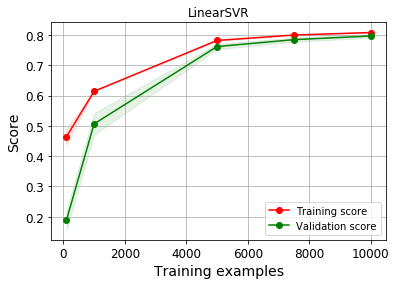

In [0]:
# LEARNING CURVE TO EVALUATE PERFORMANCE BASED ON BLOCKS OF SAMPLES
plot_learning_curve_samples(lin_SVR, 'LinearSVR', X_poly, y_train, ylim=None, cv=cv,
                        n_jobs=-1, train_sizes=size)

In [0]:
# DETERMINE BEST PARAMETERS RESULTED ASSOCIATED WITH X_POLY DATA
param ={'C':[0.3,0.6,1,10,100],'epsilon': [0.01,0.03,0.06,1,10,100]}
best_parameters_poly(lin_SVR,param,cv=cv)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.1min finished


Best_results: 0.824137422871571
Best_parameters: {'C': 10, 'epsilon': 10}
Best_estimator: LinearSVR(C=10, dual=True, epsilon=10, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


CONCLUSION:

Summary:  Dataset with feature engineering resulted in R^2 of 0.8067 for Linear SVR  algorithm.

#4.SVR EVALUATION

In [0]:
from sklearn.svm import SVR
SVR=SVR()
SVR.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'auto_deprecated',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [0]:
# SVR model applying on Train Data WITHOUT feature engineering

SVR.fit(X_train,y_train)
y_pred_SVR=SVR.predict(X_train)
lin_perform_metrics(y_train,y_pred_SVR)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


R2_Square:  0.2611777119405837
Explained_Variance_Score:  0.3114429377267419
Mean_absolute_error:  106.4164886633958
Median_absolute_error:  71.39670635470401
Max_error:  737.308768569687
MSE:  24204.538106392774
RMSE:  155.57807720367538


In [0]:
# CROSS VALIDATION SCORE EVALUATION - MEAN OF R2
cross_val_score(SVR,X_train,y_train,cv=cv).mean()



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

0.2525148695261212

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

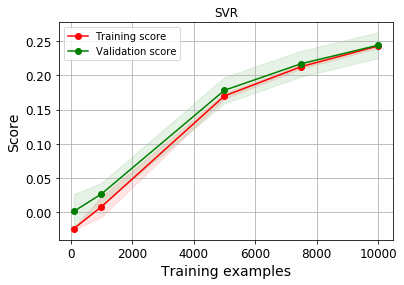

In [0]:
# learning curve evaluation
plot_learning_curve_samples(SVR, 'SVR', X_train, y_train, ylim=None, cv=cv,
                        n_jobs=-1, train_sizes=size)

In [0]:
# SVR model applying on Train Data WITH feature engineering

SVR.fit(X_poly,y_train)
y_pred_SVR_poly=SVR.predict(X_poly)
lin_perform_metrics(y_train,y_pred_SVR_poly)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


R2_Square:  0.10168956079933955
Explained_Variance_Score:  0.16798238259153275
Mean_absolute_error:  120.7601091775984
Median_absolute_error:  88.74450057622401
Max_error:  790.815318289249
MSE:  29253.702856753232
RMSE:  171.03713882298555


In [0]:
# CROSS VALIDATION SCORE EVALUATION - MEAN OF R2
cross_val_score(SVR,X_poly,y_train,cv=cv).mean()



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

0.0910090887185098

In [0]:
param ={'kernel':['linear', 'poly', 'rbf']}
best_parameters_poly(SVR,param,cv=cv)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 20.6min finished


Best_results: 0.8035877593540758
Best_parameters: {'kernel': 'linear'}
Best_estimator: SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


Summary:  Dataset with feature engineering resulted in R^2 of 0..8036 for SV Regressor algorithm.

#5.DECISIONTREEREGRESSOR

In [0]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_reg=DecisionTreeRegressor()
decision_tree_reg.get_params

<bound method BaseEstimator.get_params of DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')>

In [0]:
# Model applying on Train Data WITHOUT feature engineering

decision_tree_reg.fit(X_train,y_train)
y_pred_DT=decision_tree_reg.predict(X_train)
lin_perform_metrics(y_train,y_pred_DT)

R2_Square:  0.9999628827723317
Explained_Variance_Score:  0.9999628827723317
Mean_absolute_error:  0.030640868877220742
Median_absolute_error:  0.0
Max_error:  67.0
MSE:  1.2159965475077321
RMSE:  1.1027223347278916


In [0]:
# CROSS VALIDATION SCORE EVALUATION - MEAN OF R2
cross_val_score(decision_tree_reg,X_train,y_train,cv=cv).mean()



0.6928397674269655

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

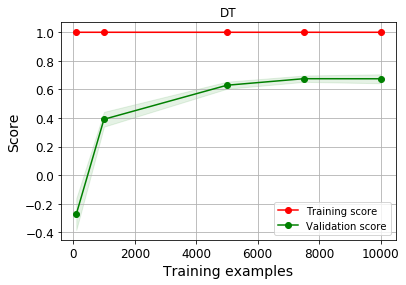

In [0]:
# learning curve evaluation
plot_learning_curve_samples(decision_tree_reg, 'DT', X_train, y_train, ylim=None, cv=cv,
                        n_jobs=-1, train_sizes=size)

Comments: Not performing well in cv due to overfitting.

In [0]:
# model applying on Train Data WITH feature engineering

decision_tree_reg.fit(X_poly,y_train)
y_pred_DT_poly=decision_tree_reg.predict(X_poly)
lin_perform_metrics(y_train,y_pred_DT_poly)

R2_Square:  0.9999628827723317
Explained_Variance_Score:  0.9999628827723317
Mean_absolute_error:  0.030640868877220742
Median_absolute_error:  0.0
Max_error:  67.0
MSE:  1.2159965475077321
RMSE:  1.1027223347278916


In [0]:
# CROSS VALIDATION SCORE EVALUATION - MEAN OF R2
cross_val_score(decision_tree_reg,X_poly,y_train,cv=cv).mean()

0.6850356155932438

In [0]:
# DETERMINE BEST PARAMETERS RESULTED ASSOCIATED WITH X_TRAIN DATA

param={'max_features': [0.69,0.7,0.71],'max_depth':[10,12,15],'min_samples_leaf':[0.001,0.0015,0.002]}

best_parameters(decision_tree_reg,param,cv=cv)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.6s


Best_results: 0.7254413126025471
Best_parameters: {'max_depth': 15, 'max_features': 0.71, 'min_samples_leaf': 0.001}
Best_estimator: DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=0.71,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.001,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   19.4s finished


Summary:  Dataset without feature engineering resulted in R^2 of 0.7254 for Decision Tree Regressor algorithm.

#6.KNEIGHBORS-REGRESSOR

In [0]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg=KNeighborsRegressor()
knn_reg.get_params

<bound method BaseEstimator.get_params of KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')>

In [0]:
# Model applying on Train Data WITHOUT feature engineering

knn_reg.fit(X_train,y_train)
y_pred_knn=knn_reg.predict(X_train)
lin_perform_metrics(y_train,y_pred_knn)

R2_Square:  0.7541366768751541
Explained_Variance_Score:  0.7541588787900734
Mean_absolute_error:  60.90685463569014
Median_absolute_error:  40.0
Max_error:  616.8
MSE:  8054.722048478745
RMSE:  89.74810331410211


In [0]:
# CROSS VALIDATION SCORE EVALUATION - MEAN OF R2
cross_val_score(knn_reg,X_train,y_train,cv=cv).mean()

0.6080392303948567

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

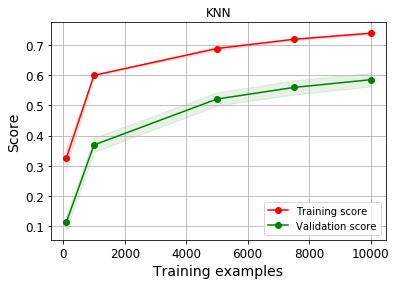

In [0]:
# learning curve evaluation
plot_learning_curve_samples(knn_reg, 'KNN', X_train, y_train, ylim=None, cv=cv,
                        n_jobs=-1, train_sizes=size)

In [0]:
knn_reg.fit(X_poly,y_train)
y_pred_knn_poly=knn_reg.predict(X_poly)
lin_perform_metrics(y_train,y_pred_knn_poly)

R2_Square:  0.7570040774874776
Explained_Variance_Score:  0.7570081482212435
Mean_absolute_error:  61.08947709127526
Median_absolute_error:  40.19999999999999
Max_error:  576.6
MSE:  7996.609126087895
RMSE:  89.42376152951684


In [0]:
# CROSS VALIDATION SCORE EVALUATION - MEAN OF R2
cross_val_score(knn_reg,X_poly,y_train,cv=cv).mean()

0.6047874076922802

In [0]:
# DETERMINE BEST PARAMETERS RESULTED ASSOCIATED WITH X_TRAIN DATA
param=[{'n_neighbors': [5,10,15],'leaf_size': [30,40,50],}]
best_parameters_poly(knn_reg,param,cv=cv)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.3min


Best_results: 0.5946768752989717
Best_parameters: {'leaf_size': 30, 'n_neighbors': 5}
Best_estimator: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  2.5min finished


Summary:  Dataset with feature engineering resulted in R^2 of 0.5946 for KNeightbors Regressor algorithm.

#7.RANDOMFOREST - REGRESSOR

In [36]:
from sklearn.ensemble import RandomForestRegressor
random_reg=RandomForestRegressor()
random_reg.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [0]:
random_reg.fit(X_train,y_train)
y_pred_random=random_reg.predict(X_train)
lin_perform_metrics(y_train,y_pred_random)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


R2_Square:  0.9671568885815681
Explained_Variance_Score:  0.967193978160988
Mean_absolute_error:  19.651861588625955
Median_absolute_error:  10.100000000000023
Max_error:  307.7
MSE:  1076.1100572364478
RMSE:  32.804116467852744


In [0]:
# CROSS VALIDATION SCORE EVALUATION - MEAN OF R2
cross_val_score(random_reg,X_train,y_train,cv=cv).mean()

0.8202394719092576

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

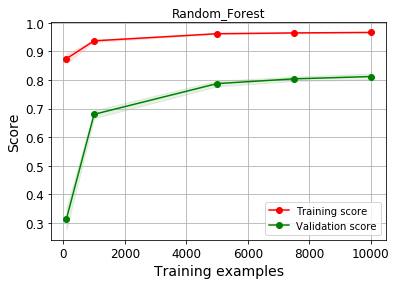

In [0]:
# learning curve evaluation
plot_learning_curve_samples(random_reg, 'Random_Forest', X_train, y_train, ylim=None, cv=cv,
                        n_jobs=-1, train_sizes=size)

In [0]:
# from Hithendar
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

regressor = RandomForestRegressor()
parameters = [{'n_estimators' : [150,200,250,300], 'max_features' : ['auto','sqrt','log2']}]
grid_search = GridSearchCV(estimator = regressor, param_grid = parameters)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [0]:
print(best_parameters)
print(best_accuracy)

{'max_features': 'auto', 'n_estimators': 300}
0.8312165428200716


In [0]:
param = [{'n_estimators' : [150,200,250,300], 'max_features' : ['auto','sqrt','log2']}]
best_parameters(random_reg,param,cv=2)
# this is very time consuming process....

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  8.2min finished


Best_results: 0.8262559668916158
Best_parameters: {'max_features': 'auto', 'n_estimators': 300}
Best_estimator: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


In [0]:
random_reg.fit(X_poly,y_train)
y_pred_random_poly=random_reg.predict(X_poly)
lin_perform_metrics(y_train,y_pred_random_poly)

R2_Square:  0.9678316387287264
Explained_Variance_Score:  0.9678319020423837
Mean_absolute_error:  19.68017250473519
Median_absolute_error:  10.299999999999997
Max_error:  413.4
MSE:  1054.0017554306905
RMSE:  32.4653931969211


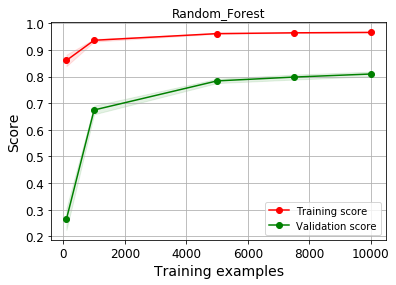

In [37]:
# learning curve evaluation
plot_learning_curve_samples(random_reg, 'Random_Forest', X_poly, y_train, ylim=None, cv=cv,
                        n_jobs=-1, train_sizes=size)
save_results_to = ''
plt.savefig(save_results_to + 'Random_Forest_additional_features', dpi = 300)

In [0]:
# CROSS VALIDATION SCORE EVALUATION - MEAN OF R2
cross_val_score(random_reg,X_poly,y_train,cv=cv).mean()

0.8203102297919515

Summary:  Dataset without feature engineering resulted in R^2 of 0.8337 for Random Forest algorithm.

#8.BAGGING -REGRESSOR

In [0]:
from sklearn.ensemble import BaggingRegressor
bag_reg=BaggingRegressor(random_state=42)
bag_reg.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [0]:
bag_reg.fit(X_train,y_train)
y_pred_bag=bag_reg.predict(X_train)
lin_perform_metrics(y_train,y_pred_bag)

R2_Square:  0.9693556518551601
Explained_Variance_Score:  0.9693754572621
Mean_absolute_error:  19.3224519887794
Median_absolute_error:  9.900000000000006
Max_error:  264.5
MSE:  1008.4567325421373
RMSE:  31.7562077796159


In [0]:
# CROSS VALIDATION SCORE EVALUATION - MEAN OF R2
cross_val_score(bag_reg,X_train,y_train,cv=cv).mean()

0.8215451437411845

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

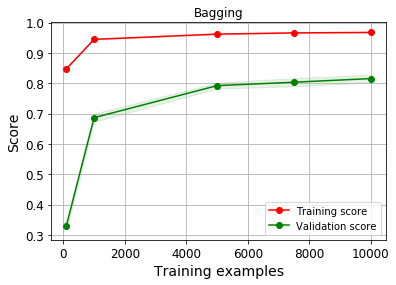

In [0]:
# learning curve evaluation
plot_learning_curve_samples(bag_reg, 'Bagging', X_train, y_train, ylim=None, cv=cv,
                        n_jobs=-1, train_sizes=size)

In [0]:
bag_reg.fit(X_poly,y_train)
y_pred_bag_poly=bag_reg.predict(X_poly)
lin_perform_metrics(y_train,y_pred_bag_poly)

R2_Square:  0.9681550747459364
Explained_Variance_Score:  0.9681570620094164
Mean_absolute_error:  19.612846627826126
Median_absolute_error:  10.099999999999994
Max_error:  313.79999999999995
MSE:  1047.965814706658
RMSE:  32.37230011455253


In [0]:
# CROSS VALIDATION SCORE EVALUATION - MEAN OF R2
cross_val_score(bag_reg,X_poly,y_train,cv=cv).mean()

0.821024962942753

In [0]:
# DETERMINE BEST PARAMETERS RESULTED ASSOCIATED WITH X_TRAIN DATA
param ={'max_features': [1],'n_estimators':[10]}
best_parameters_poly(bag_reg,param,cv=cv)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best_results: 0.009712246171741722
Best_parameters: {'max_features': 1, 'n_estimators': 10}
Best_estimator: BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1, max_samples=1.0, n_estimators=10, n_jobs=None,
                 oob_score=False, random_state=42, verbose=0, warm_start=False)


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished


Summary:  Dataset without feature engineering resulted in R^2 of 0.82 for Bagging Regressor.

#9.VOTING - REGRESSOR

In [0]:
from sklearn.ensemble import VotingRegressor
voting_reg=VotingRegressor([('Bagging',bag_reg),('random_forest',random_reg),('KNeighbors',knn_reg),
                            ('Decision_tree',decision_tree_reg),('SVR',SVR),('Linear_SVR',lin_SVR),
                           ('Linear_regression',lin_reg),('SGD_Regression',lin_reg_SGD)])

In [0]:
from sklearn.ensemble import VotingRegressor
voting_reg=VotingRegressor([('Bagging',bag_reg),('random_forest',random_reg),('KNeighbors',knn_reg),
                            ('Decision_tree',decision_tree_reg),('SVR',SVR),('Linear_SVR',lin_SVR),
                           ('Linear_regression',lin_reg),('SGD_Regression',lin_reg_SGD)])
voting_reg.fit(X_train,y_train)
y_pred_voting_reg=voting_reg.predict(X_train)
lin_perform_metrics(y_train,y_pred_voting_reg)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


R2_Square:  0.8519626355760865
Explained_Variance_Score:  0.8535176678822731
Mean_absolute_error:  48.1274729452754
Median_absolute_error:  32.78111217725031
Max_error:  357.36210173430027
MSE:  4871.674088659906
RMSE:  69.7973788093787


Summary:  Dataset without feature engineering resulted in R^2 of 0.852 for Gradient Boosting Regressor algorithm.

In [0]:
# CROSS VALIDATION SCORE EVALUATION - MEAN OF R2
cross_val_score(voting_reg,X_train,y_train,cv=cv).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to 

0.7666171999325883

In [0]:
# CROSS VALIDATION SCORE EVALUATION - MEAN OF R2
cross_val_score(voting_reg,X_poly,y_train,cv=cv).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to 

0.8227991645784952

#10.REGULARIZATION - RIDGE, LASSO & ELASTICNET

In [0]:
from sklearn.linear_model import ElasticNet,Ridge,Lasso


#RIDGE

In [0]:
lin_reg_ridge=Ridge(random_state=42)
lin_reg_ridge.get_params()


{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': 42,
 'solver': 'auto',
 'tol': 0.001}

In [0]:
lin_reg_ridge.fit(X_train,y_train)
y_pred_ridge=lin_reg_ridge.predict(X_train)

lin_perform_metrics(y_train,y_pred_ridge)

R2_Square:  0.6333153782627892
Explained_Variance_Score:  0.6333153802117362
Mean_absolute_error:  79.26602188100725
Median_absolute_error:  56.63909008326195
Max_error:  476.67373277227273
MSE:  12014.48316689951
RMSE:  109.61059787675418


In [0]:
# CROSS VALIDATION SCORE EVALUATION - MEAN OF R2

cross_val_score(lin_reg_ridge,X_train,y_train,cv=cv).mean()

0.6303102044462026

In [0]:
# SGD model applying on Train Data with feature engineering

lin_reg_ridge.fit(X_poly,y_train)
y_pred_ridge_poly=lin_reg_ridge.predict(X_poly)
lin_perform_metrics(y_train,y_pred_ridge_poly)

R2_Square:  0.8579237229831651
Explained_Variance_Score:  0.8579237231086724
Mean_absolute_error:  49.5543129691245
Median_absolute_error:  35.752660990657986
Max_error:  415.8863422684266
MSE:  4655.153059180753
RMSE:  68.22868208591423


In [0]:
# Evaluate Cross Val Score on Dataset with added features
cross_val_score(lin_reg_ridge,X_poly,y_train,cv=cv).mean()

0.8374402883161943

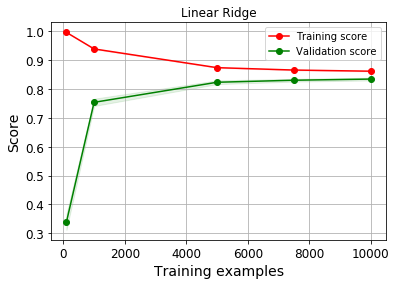

In [0]:
# LEARNING CURVE TO EVALUATE PERFORMANCE BASED ON BLOCKS OF SAMPLES

size=[100,1000,5000,7500,10000]
plot_learning_curve_samples(lin_reg_ridge, 'Linear Ridge_additional_feature', X_poly, y_train, ylim=None, cv=cv,
                        n_jobs=-1, train_sizes=size)
save_results_to = ''
plt.savefig(save_results_to + 'BEST_SOLUTION_ridge.png', dpi = 300)

In [0]:
save_results_to = ''
plt.savefig(save_results_to + 'BEST_SOLUTION.png', dpi = 300)

#LASSO

In [0]:
lin_reg_lasso=Lasso(random_state=42)
lin_reg_lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': 42,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [0]:
lin_reg_lasso.fit(X_train,y_train)
y_pred_lasso=lin_reg_lasso.predict(X_train)

lin_perform_metrics(y_train,y_pred_lasso)

R2_Square:  0.6095893977896276
Explained_Variance_Score:  0.6095893977896277
Mean_absolute_error:  82.01205613748988
Median_absolute_error:  59.040115741902014
Max_error:  497.23437196973333
MSE:  12847.791651302496
RMSE:  113.34809946047837


In [0]:
# CROSS VALIDATION SCORE EVALUATION - MEAN OF R2

cross_val_score(lin_reg_lasso,X_train,y_train,cv=cv).mean()

0.6067986473313757

In [0]:
# model applying on Train Data with feature engineering

lin_reg_lasso.fit(X_poly,y_train)
y_pred_lasso_poly=lin_reg_lasso.predict(X_poly)
lin_perform_metrics(y_train,y_pred_lasso_poly)

R2_Square:  0.7576431951791133
Explained_Variance_Score:  0.7576431951791134
Mean_absolute_error:  65.87483367855849
Median_absolute_error:  49.45996682807845
Max_error:  391.4252494352576
MSE:  7975.576779895686
RMSE:  89.30608478651209


In [0]:
# CROSS VALIDATION SCORE EVALUATION - MEAN OF R2

cross_val_score(lin_reg_lasso,X_poly,y_train,cv=cv).mean()

0.7533756459859584

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

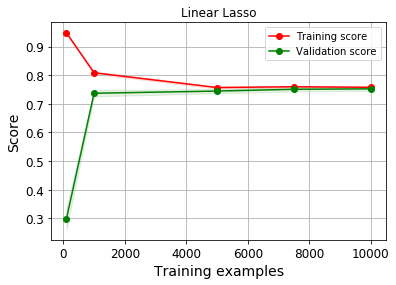

In [0]:
# LEARNING CURVE TO EVALUATE PERFORMANCE BASED ON BLOCKS OF SAMPLES

size=[100,1000,5000,7500,10000]
plot_learning_curve_samples(lin_reg_lasso, 'Linear Lasso', X_poly, y_train, ylim=None, cv=cv,
                        n_jobs=-1, train_sizes=size)

#ELASTICNET

In [0]:
lin_reg_elasticnet=ElasticNet(random_state=42)
lin_reg_elasticnet.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': 42,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [0]:
lin_reg_elasticnet.fit(X_train,y_train)
y_pred_elasticnet=lin_reg_elasticnet.predict(X_train)

lin_perform_metrics(y_train,y_pred_elasticnet)

R2_Square:  0.29637353840005876
Explained_Variance_Score:  0.29637353840005876
Mean_absolute_error:  114.16234896593066
Median_absolute_error:  90.91706322131782
Max_error:  698.914785846821
MSE:  23155.22715776049
RMSE:  152.1684170837053


In [0]:
# CROSS VALIDATION SCORE EVALUATION - MEAN OF R2

cross_val_score(lin_reg_elasticnet,X_train,y_train,cv=cv).mean()

0.294726349109928

In [0]:
# model applying on Train Data with feature engineering

lin_reg_elasticnet.fit(X_poly,y_train)
y_pred_elasticnet_poly=lin_reg_elasticnet.predict(X_poly)

lin_perform_metrics(y_train,y_pred_elasticnet_poly)

R2_Square:  0.46408325160365427
Explained_Variance_Score:  0.46408325160365427
Mean_absolute_error:  98.24432940799784
Median_absolute_error:  76.91663601426811
Max_error:  604.2315975364867
MSE:  17636.167375725083
RMSE:  132.80123258360626


In [0]:
# CROSS VALIDATION SCORE EVALUATION - MEAN OF R2

cross_val_score(lin_reg_elasticnet,X_poly,y_train,cv=cv).mean()

0.46019225552513154

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

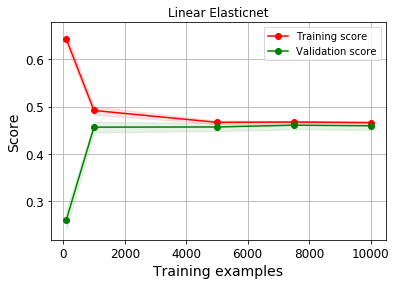

In [0]:
# LEARNING CURVE TO EVALUATE PERFORMANCE BASED ON BLOCKS OF SAMPLES

size=[100,1000,5000,7500,10000]
plot_learning_curve_samples(lin_reg_elasticnet, 'Linear Elasticnet', X_poly, y_train, ylim=None, cv=cv,
                        n_jobs=-1, train_sizes=size)

#BEST PARAMETERS

In [0]:
# DETERMINE BEST PARAMETERS RESULTED ASSOCIATED WITH X_POLY DATA

alpha=[0.0001,0.001,0.01,0.1,1,10,100]
#estimators=[lin_reg_ridge,lin_reg_lasso,lin_reg_elasticnet]
param ={'alpha':alpha}
best_parameters_poly(lin_reg_ridge,param,cv=cv)




Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  1.4min finished


Best_results: 0.8398230385631523
Best_parameters: {'alpha': 10}
Best_estimator: Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=42, solver='auto', tol=0.001)


Summary:  Dataset with feature engineering resulted in R^2 of 0.8398 for Ridge linear algorithm.

#11.GRADIENT BOOSTING REGRESSOR

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
lin_reg_boosting=GradientBoostingRegressor(max_depth=4,n_estimators=200)
lin_reg_boosting.get_params()

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [40]:
lin_reg_boosting.fit(X_train,y_train)
y_pred_boosting=lin_reg_boosting.predict(X_train)

lin_perform_metrics(y_train,y_pred_boosting)

R2_Square:  0.8462297206386022
Explained_Variance_Score:  0.8462297206386021
Mean_absolute_error:  49.761011736526136
Median_absolute_error:  33.143443142169346
Max_error:  417.6822383125031
MSE:  5038.309008445308
RMSE:  70.98104682551046


In [41]:
# CROSS VALIDATION SCORE EVALUATION - MEAN OF R2

cross_val_score(lin_reg_boosting,X_train,y_train,cv=cv).mean()

0.8242665614621604

In [42]:
lin_reg_boosting.fit(X_poly,y_train)
y_pred_boosting_poly=lin_reg_boosting.predict(X_poly)

lin_perform_metrics(y_train,y_pred_boosting_poly)

R2_Square:  0.8792380913903609
Explained_Variance_Score:  0.8792380913903609
Mean_absolute_error:  45.516768241866224
Median_absolute_error:  32.40517503925298
Max_error:  420.97269729588345
MSE:  3956.7842014191856
RMSE:  62.90297450374812


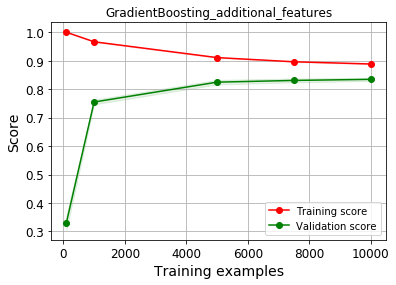

In [44]:
plot_learning_curve_samples(lin_reg_boosting, 'GradientBoosting_additional_features', X_poly, y_train, ylim=None, cv=cv,
                        n_jobs=-1, train_sizes=size)
save_results_to = ''
plt.savefig(save_results_to + 'GradientBoosting', dpi = 300)

In [45]:
# CROSS VALIDATION SCORE EVALUATION - MEAN OF R2

cross_val_score(lin_reg_boosting,X_poly,y_train,cv=cv).mean()

0.8364402114863252

In [0]:
# DETERMINE BEST PARAMETERS RESULTED ASSOCIATED WITH X_TRAIN DATA
param ={'max_depth':[2,3,4],'n_estimators':[100,150,200]}
best_parameters_poly(lin_reg_boosting,param,cv=cv)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 26.7min finished


Best_results: 0.8391519450108583
Best_parameters: {'max_depth': 4, 'n_estimators': 200}
Best_estimator: GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [0]:
lin_perform_metrics(y_train,y_pred_boosting_poly)

Summary:  Dataset with feature engineering resulted in R^2 of 0.839 for Gradient Boosting Regressor algorithm.

#12.NEURAL NETWORK

In [0]:
def create_mlp(dim, regress=False):
	# define our MLP network
	model = Sequential()
	model.add(Dense(30, input_dim=dim, activation="relu"))
	model.add(Dense(10, activation="relu"))

	# check to see if the regression node should be added
	if regress:
		model.add(Dense(1, activation="linear"))

	# return our model
	return model

In [0]:
from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [0]:
X_train_nn, X_valid_nn, y_train_nn, y_valid_nn = train_test_split(X_train, y_train, random_state=42)


In [0]:
X_train_nn_p, X_valid_nn_p, y_train_nn_p, y_valid_nn_p = train_test_split(X_poly, y_train, random_state=42)

In [0]:
from keras.optimizers import Adam,SGD
from keras.models import Sequential
from keras.layers.core import Dense

model = create_mlp(X_poly.shape[1], regress=True)
opt =Adam()
model.compile(loss="mean_absolute_percentage_error", optimizer=opt,metrics=[coeff_determination])
history_1 = model.fit(X_train_nn_p, y_train_nn_p, epochs=30, validation_data=(X_valid_nn_p, y_valid_nn_p))

Train on 10427 samples, validate on 3476 samples
Epoch 1/30
10427/10427 [==============================] - 2s 233us/step - loss: 86.0301 - coeff_determination: -1.0752 - val_loss: 78.2434 - val_coeff_determination: -0.8737
Epoch 2/30
10427/10427 [==============================] - 1s 140us/step - loss: 64.1208 - coeff_determination: -0.5264 - val_loss: 54.8815 - val_coeff_determination: -0.1548
Epoch 3/30
10427/10427 [==============================] - 1s 142us/step - loss: 45.7853 - coeff_determination: 0.1360 - val_loss: 44.3731 - val_coeff_determination: 0.3127
Epoch 4/30
10427/10427 [==============================] - 2s 144us/step - loss: 38.1574 - coeff_determination: 0.4304 - val_loss: 40.5683 - val_coeff_determination: 0.4981
Epoch 5/30
10427/10427 [==============================] - 2s 144us/step - loss: 34.3664 - coeff_determination: 0.5762 - val_loss: 38.2136 - val_coeff_determination: 0.6021
Epoch 6/30
10427/10427 [==============================] - 1s 143us/step - loss: 32.1465

(0, 1)

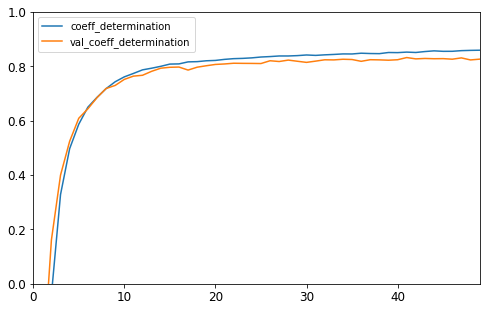

In [0]:
df_1=pd.DataFrame(history_1.history)
df_1[['coeff_determination','val_coeff_determination']].plot(figsize=(8,5))
plt.gca().set_ylim(0, 1)

In [0]:
df_1[['coeff_determination','val_coeff_determination']].mean()

coeff_determination        0.715489
val_coeff_determination    0.713778
dtype: float64

In [0]:
from tensorflow import keras

X_train_nn, X_valid_nn, y_train_nn, y_valid_nn = train_test_split(X_train, y_train, random_state=42)

model = keras.models.Sequential([keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
                                 keras.layers.Dense(1)])
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(lr=1e-3),metrics=[coeff_determination])
history = model.fit(X_train_nn, y_train_nn, epochs=20, validation_data=(X_valid_nn, y_valid_nn))


Train on 10427 samples, validate on 3476 samples
Epoch 1/20
10427/10427 [==============================] - 1s 103us/sample - loss: 16872.0308 - coeff_determination: 0.4377 - val_loss: 11393.5602 - val_coeff_determination: 0.6260
Epoch 2/20
10427/10427 [==============================] - 1s 87us/sample - loss: 9446.3624 - coeff_determination: 0.6832 - val_loss: 6675.3783 - val_coeff_determination: 0.7864
Epoch 3/20
10427/10427 [==============================] - 1s 88us/sample - loss: 7579.1897 - coeff_determination: 0.7454 - val_loss: 6823.0282 - val_coeff_determination: 0.7682
Epoch 4/20
10427/10427 [==============================] - 1s 85us/sample - loss: 6752.1117 - coeff_determination: 0.7686 - val_loss: 6525.2746 - val_coeff_determination: 0.7917
Epoch 5/20
10427/10427 [==============================] - 1s 90us/sample - loss: 6187.8912 - coeff_determination: 0.7956 - val_loss: 7022.0223 - val_coeff_determination: 0.7796
Epoch 6/20
10427/10427 [==============================] - 1s 87

(0, 1)

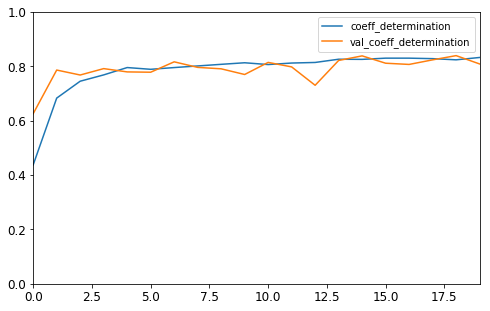

In [0]:
df=pd.DataFrame(history.history)
df[['coeff_determination','val_coeff_determination']].plot(figsize=(8,5))
plt.gca().set_ylim(0, 1)

In [0]:
df[['coeff_determination','val_coeff_determination']].mean()

coeff_determination        0.783398
val_coeff_determination    0.789922
dtype: float64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
loss                       20 non-null float64
coeff_determination        20 non-null float64
val_loss                   20 non-null float64
val_coeff_determination    20 non-null float64
dtypes: float64(4)
memory usage: 720.0 bytes


In [0]:

X_train_nn_poly, X_valid_nn_poly, y_train_nn_poly, y_valid_nn_poly = train_test_split(X_poly, y_train, random_state=42)

model = keras.models.Sequential([keras.layers.Dense(30, activation="relu", input_shape=X_poly.shape[1:]),keras.layers.Dense(1)])
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(lr=1e-3),metrics=[coeff_determination])
history = model.fit(X_train_nn_poly, y_train_nn_poly, epochs=20, validation_data=(X_valid_nn_poly, y_valid_nn_poly))


Train on 10427 samples, validate on 3476 samples
Epoch 1/20
10427/10427 [==============================] - 1s 113us/sample - loss: 34096.7476 - coeff_determination: -0.1080 - val_loss: 56945.9110 - val_coeff_determination: -0.7683
Epoch 2/20
10427/10427 [==============================] - 1s 92us/sample - loss: 44840.6059 - coeff_determination: -0.4212 - val_loss: 37643.1578 - val_coeff_determination: -0.1330
Epoch 3/20
10427/10427 [==============================] - 1s 95us/sample - loss: 30905.2276 - coeff_determination: 0.0469 - val_loss: 28426.8161 - val_coeff_determination: 0.1516
Epoch 4/20
10427/10427 [==============================] - 1s 95us/sample - loss: 23653.2585 - coeff_determination: 0.2818 - val_loss: 22721.0988 - val_coeff_determination: 0.3303
Epoch 5/20
10427/10427 [==============================] - 1s 97us/sample - loss: 19396.2298 - coeff_determination: 0.4125 - val_loss: 18458.2172 - val_coeff_determination: 0.4697
Epoch 6/20
10427/10427 [===========================

#12.SUMMARY OF BEST RESULTS

1. SGD REGRESSOR: Best_results with  2 degree polynomial feature : 0.8383639259139997/Best_parameters: {'alpha': 0.001, 'penalty': 'elasticnet'}/ No overfitting

2. LINEAR REGRESSION : Best_results with  2 degree polynomial feature : 0.8369484969213683/Best_parameters: default value/No overfitting

3. LINEAR - SVR : Best_results with  2 degree polynomial feature: 0.8067299323898737/Best_parameters: {'C': 1, 'epsilon': 0.06}/No overfitting

4. SVR: Best_results without feature engineering: 0.5666537147982439/ Best_parameters: {'kernel': 'linear'}/ No overfitting

5. DECISION TREE: Best_results with  2 degree polynomial feature : 0.7254413126025471/Best_parameters: {'max_depth': 15, 'max_features': 0.71, 'min_samples_leaf': 0.001}/OVERFITTING

6. KNEIGHBORS: Best_results without feature engineering: 0.6133113737857521/Best_parameters: {'leaf_size': 30, 'n_neighbors': 5}/OVERFITTING

7.RANDOMFOREST:  Best_results without feature engineering: 0.8262559668916158/Best_parameters: {'max_features': 'auto', 'n_estimators': 300}/OVERFITTING

8. BAGGING: Best_results without feature engineering : 0.8215451437411845/Best_parameters: default value/OVERFITTING

9. VOTING: Best_results without feature engineering and default cv:   0.7666171999325883/OVERFITTING

10. REGULARIZATION - RIDGE : Best_results without feature engineering: 0.8398230385631523/Best_parameters: {'alpha': 10}/No overfitting

11. BOOSTING : Best_results: 0.8391519450108583 / Best_parameters: {'max_depth': 4, 'n_estimators': 200}/No overfitting

12. NEURAL NETWORK


CONCLUSION: SOME OF THE BEST MODELS ARE BOOSTING, RIDGE, SGD REGRESSOR,LINEAR REGRESSION - WITH CLOSE TO 0.84 R2 SCORE.

In [0]:
print('BOOSTING : Best_results:' 0.8391519450108583 / Best_parameters: {'max_depth': 4, 'n_estimators': 200}/No overfitting)

#13.TEST MODELS

#LINEAR REGRESSION

In [0]:
y_pred_test_lr=lin_reg.predict(X_poly_test)
lin_perform_metrics(y_test,y_pred_test_lr)

R2_Square:  0.8347872765256323
Explained_Variance_Score:  0.8347902554913416
Mean_absolute_error:  53.58571465680695
Median_absolute_error:  37.83315012525807
Max_error:  374.6470617249621
MSE:  5524.231472061012
RMSE:  74.32517387844452


# LINEAR SGD

In [0]:
y_pred_test_SGD=lin_reg_SGD.predict(X_poly_test)
lin_perform_metrics(y_test,y_pred_test_SGD)

R2_Square:  0.8371448664176161
Explained_Variance_Score:  0.8371509656517235
Mean_absolute_error:  53.493466003968535
Median_absolute_error:  37.747131123135084
Max_error:  365.60281341259076
MSE:  5445.400544238859
RMSE:  73.79295728075179


# RIDGE

In [0]:
y_pred_test_ridge=lin_reg_ridge.predict(X_poly_test)
lin_perform_metrics(y_test,y_pred_test_ridge)

R2_Square:  0.8370721231284187
Explained_Variance_Score:  0.8370776260034953
Mean_absolute_error:  53.163349494977396
Median_absolute_error:  37.79986549276791
Max_error:  369.0919164720194
MSE:  5447.83286760424
RMSE:  73.80943616912569


#GRADIENT BOOSTING

In [43]:
y_pred_lin_reg_boosting=lin_reg_boosting.predict(X_poly_test)
lin_perform_metrics(y_test,y_pred_lin_reg_boosting)

R2_Square:  0.8399968586862423
Explained_Variance_Score:  0.8400162555586852
Mean_absolute_error:  51.51212676840246
Median_absolute_error:  34.84228204869805
Max_error:  412.03051889537295
MSE:  5350.03824333917
RMSE:  73.14395561725637


#RANDOM FOREST

In [0]:
y_pred_test_random_reg=random_reg.predict(X_poly_test)
lin_perform_metrics(y_test,y_pred_test_random_reg)

R2_Square:  0.8081877739351953
Explained_Variance_Score:  0.8081936797109239
Mean_absolute_error:  51.20738156885309
Median_absolute_error:  29.099999999999998
Max_error:  480.9
MSE:  6413.641235795454
RMSE:  80.08521234157686


Conclusion: Select Linear Models for implementation

Authors:  Pranav, Hitendar, Suganthan,Mubasher & Asif